IBM Attrition

Uncover the factors that lead to employee attrition and explore important questions such as:

1. Show a breakdown of distance from home by job role and attrition.

2. Compare average monthly income by education and attrition.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Import IBM Attrition csv

In [3]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1. Show a breakdown of distance from home by job role and attrition.

Select requred columns.

In [4]:
df = attrition[['Attrition', 'DistanceFromHome', 'JobRole', 'Education', 'MonthlyIncome']]
df

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,Yes,1,Sales Executive,2,5993
1,No,8,Research Scientist,1,5130
2,Yes,2,Laboratory Technician,2,2090
3,No,3,Research Scientist,4,2909
4,No,2,Laboratory Technician,1,3468
...,...,...,...,...,...
1465,No,23,Laboratory Technician,2,2571
1466,No,6,Healthcare Representative,1,9991
1467,No,4,Manufacturing Director,3,6142
1468,No,2,Sales Executive,3,5390


In [42]:
df_attrition = df[['DistanceFromHome', 'JobRole', 'Attrition']]
df_attrition.head()

,DistanceFromHome,JobRole,Attrition
0,1,Sales Executive,Yes
1,8,Research Scientist,No
2,2,Laboratory Technician,Yes
3,3,Research Scientist,No
4,2,Laboratory Technician,No


In [5]:
df_yes_attrition = df[['DistanceFromHome', 'JobRole', 'Attrition']][df['Attrition'] == 'Yes']
df_no_attrition = df[['DistanceFromHome', 'JobRole', 'Attrition']][df['Attrition'] == 'No']

In [6]:
df_yes_attrition = df_yes_attrition.rename(columns = {'Attrition':'Attrition_Yes'})
df_no_attrition = df_no_attrition.rename(columns = {'Attrition':'Attrition_No'})

In [7]:
df_yes_attrition

,DistanceFromHome,JobRole,Attrition_Yes
0,1,Sales Executive,Yes
2,2,Laboratory Technician,Yes
14,24,Laboratory Technician,Yes
21,9,Sales Representative,Yes
24,6,Research Scientist,Yes
...,...,...,...
1438,9,Sales Representative,Yes
1442,1,Research Scientist,Yes
1444,7,Laboratory Technician,Yes
1452,1,Sales Executive,Yes


In [8]:
df_no_attrition

,DistanceFromHome,JobRole,Attrition_No
1,8,Research Scientist,No
3,3,Research Scientist,No
4,2,Laboratory Technician,No
5,2,Laboratory Technician,No
6,3,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [11]:
df_yes_attrition.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_Yes
DistanceFromHome JobRole                                 
1                Human Resources                        1
                 Laboratory Technician                  4
                 Manufacturing Director                 1
                 Research Scientist                     7
                 Sales Executive                        6
...                                                   ...
29               Healthcare Representative              1
                 Laboratory Technician                  1
                 Manager                                1
                 Research Scientist                     1
                 Sales Executive                        1

[112 rows x 1 columns]

In [12]:
df_no_attrition.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_No
DistanceFromHome JobRole                                
1                Healthcare Representative            23
                 Human Resources                       8
                 Laboratory Technician                27
                 Manager                              13
                 Manufacturing Director               23
...                                                  ...
29               Manager                               3
                 Manufacturing Director                4
                 Research Scientist                    3
                 Sales Executive                       4
                 Sales Representative                  1

[217 rows x 1 columns]

Text(0, 0.5, 'JobRole')

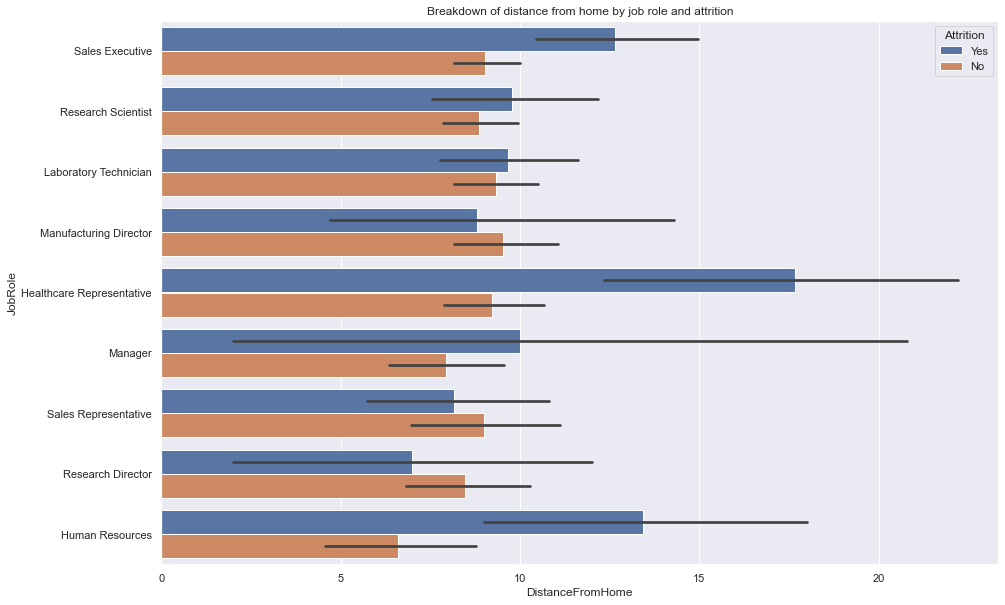

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x="DistanceFromHome", y="JobRole", hue="Attrition", data=df_attrition)
plt.title("Breakdown of distance from home by job role and attrition")
plt.xlabel("DistanceFromHome")
plt.ylabel("JobRole")

Text(0, 0.5, 'JobRole')

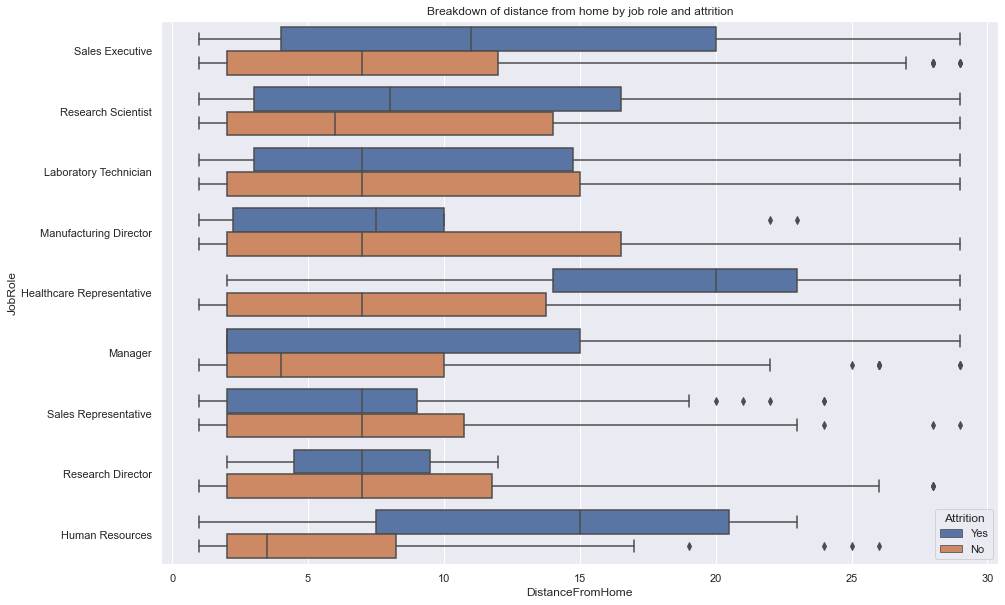

In [146]:
plt.figure(figsize=(15,10))
sns.boxplot(x="DistanceFromHome", y="JobRole", hue="Attrition", data=df_attrition)
plt.title("Breakdown of distance from home by job role and attrition")
plt.xlabel("DistanceFromHome")
plt.ylabel("JobRole")

Attrition_Yes counts by Job Role

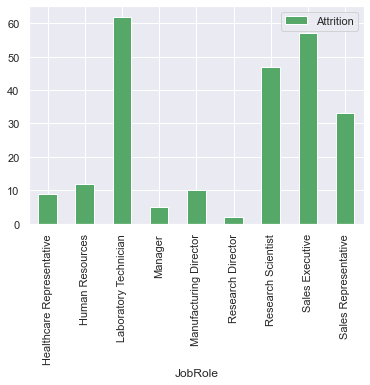

In [130]:
df_attrition2 = df[['JobRole', 'Attrition']][df['Attrition'] == 'Yes']
df_attrition2.groupby(['JobRole']).count().plot(kind="bar", color="g")

Attrition_No counts by Job Role

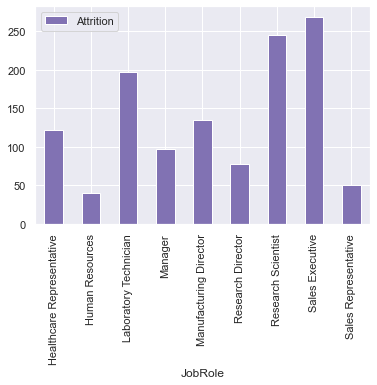

In [131]:
df_attrition3 = df[['JobRole', 'Attrition']][df['Attrition'] == 'No']
df_attrition3.groupby(['JobRole']).count().plot(kind="bar", color="m")

<Figure size 432x288 with 0 Axes>

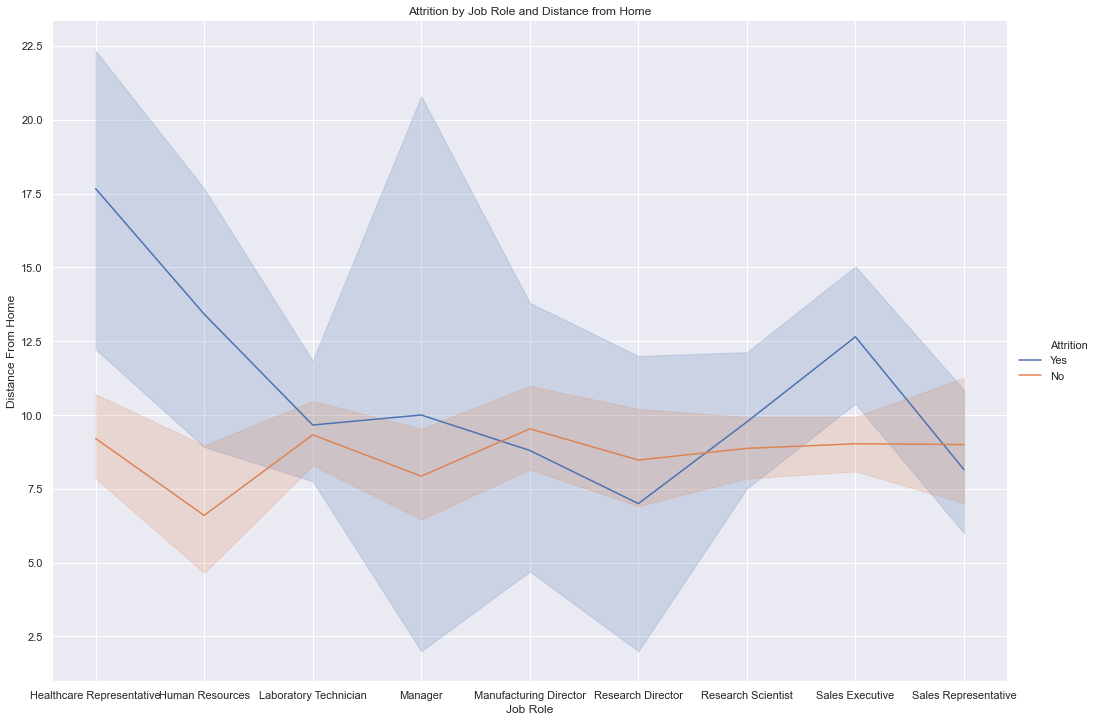

In [166]:
#df_attrition = df[['DistanceFromHome', 'JobRole', 'Attrition']]
plt.figure()
sns.relplot(x="JobRole", y="DistanceFromHome", hue="Attrition", 
            kind="line", data=df_attrition, height=10, aspect=10/7)
plt.title("Attrition by Job Role and Distance from Home")
plt.xlabel("Job Role")
plt.ylabel("Distance From Home")
plt.show()

2. Compare average monthly income by education and attrition.

In [148]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [149]:
df1 = df[['Education', 'MonthlyIncome', 'Attrition']]
df1

,Education,MonthlyIncome,Attrition
0,2,5993,Yes
1,1,5130,No
2,2,2090,Yes
3,4,2909,No
4,1,3468,No
...,...,...,...
1465,2,2571,No
1466,1,9991,No
1467,3,6142,No
1468,3,5390,No


In [150]:
df2 = df1.groupby(['Education', 'Attrition']).mean()
df2

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

<Figure size 432x288 with 0 Axes>

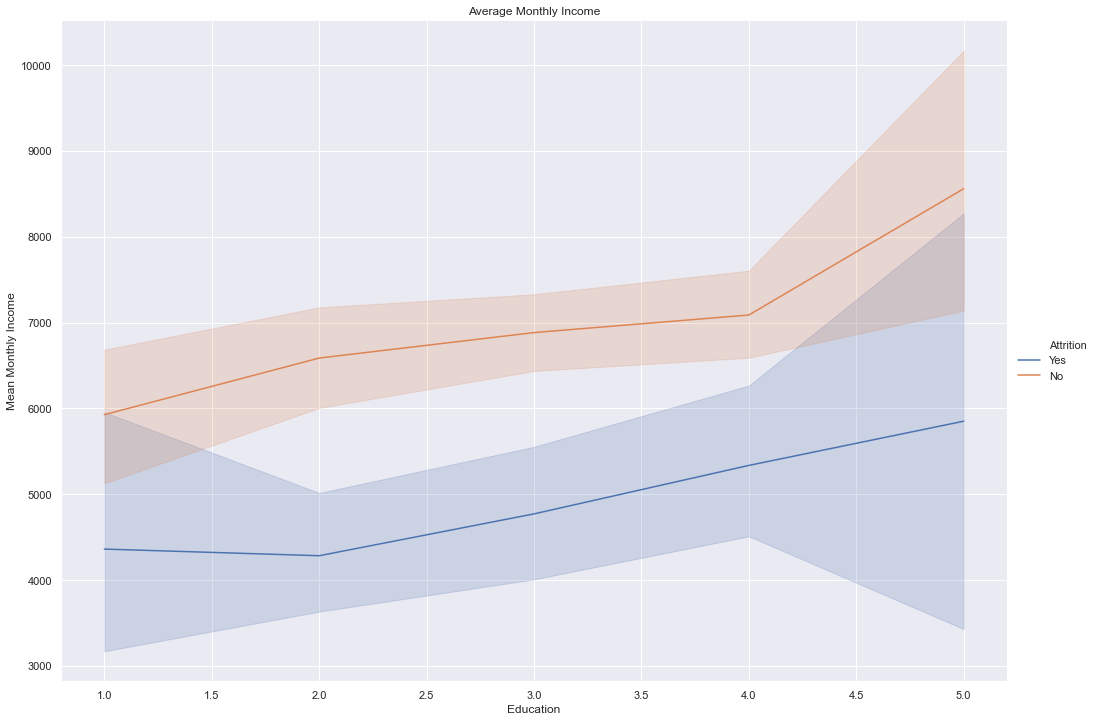

In [162]:
plt.figure()
sns.relplot(x="Education", y="MonthlyIncome", hue="Attrition", kind="line", data=df1, height=10, aspect=10/7)
plt.title("Average Monthly Income")
plt.xlabel("Education")
plt.ylabel("Mean Monthly Income")
plt.show()